# LN 2 - Veränderung der Armutsrate weltweit


**Gruppe:**
- Elena Stevanovic, Karina von Felbert, Jeremiah Otter

**Titel:** 
- Veränderung der Armutsrate weltweit

**Fragestellung:**

- Auf welchem Kontinent oder Land hat sich die Armutsrate am meisten verändert? Was sind Gründe dafür?  

**Datenquellen:**

-  https://ourworldindata.org/grapher/share-of-population-in-extreme-poverty
2. Quelle mit Informationen Analyse einfügen!!!




### 2. Daten beschaffen und laden

In [48]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [49]:
# lade hier deine Daten
file_path = "share-of-population-in-extreme-poverty.csv"

df = pd.read_csv(file_path, skiprows=1,
                 names=['Gebiet','Code','Jahr','Anteil Population in Armut','Annotierung'])
df.head()  



,Gebiet,Code,Jahr,Anteil Population in Armut,Annotierung
0,Albania,ALB,1996,0.534846,NaN
1,Albania,ALB,2002,1.092647,NaN
2,Albania,ALB,2005,0.591086,NaN
3,Albania,ALB,2008,0.199925,NaN
4,Albania,ALB,2012,0.620691,NaN


## 2. Daten vorbereiten 
**- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert**

- Unser ursprünglicher Datensatz ist im Longformat. Die Daten sind also so strukturiert, dass jede Zeile für ein spazifisches Merkmal steht (z.b. Gebiet oder Jahr)

**- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?**

- Longformat: Datenanalyse, Filterung oder Gruppierung nach Variablen, Visualisierung
- Wideformat: Erzeugung von Übersichtstabellen, Vergleich mehrerer Variablen

**- Welche Datentypen kommen in meinem Datensatz vor?**

Basierend auf unserem Pivot:
- Gebiet: String, da es Länder oder Regionen beschreibt
- Jahr: Integer, wird aber nach der Transformation zum Spaltennamen
- Anteil Population in Armut: Float, da es sich um kontinuierlich numerische Werte handelt


In [50]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Anteil Population in Armut')
df_pivot.head()

Jahr,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Gebiet,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.023101,0.096067,0.139303,0.392570,0.048107,0.00000,0.021277,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.122005,NaN,NaN,NaN,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.439143,1.146360,1.107947,0.785655,1.339821,1.03007,0.352011,0.523521,0.781078,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.498484,NaN,0.498742,NaN,0.497094,NaN,NaN,NaN,NaN,NaN



**Beobachtungen:**
- Die Rohdaten beeinhalten Länder, Code, Regionen, Kontinente, Jahre und Armut in Ländern in Prozent
- Die Spalten Gebiete enthält 169 Einträge
- Jedes Gebiet hat hat unterschiedliche Datenpunkte, es geht von 1 bis zu 60 Datenpunkte
- Die Spalte Code enthält 169 Einträge
- Die Gebiete haben unterschiedlich Datenpunkte erhoben, am meisten Daten wurden 2019 erhoben
- Daten sind zwischen 1963 bis 2023 erhoben worden
- Der Anteil an Armut in den Ländern streut zwischen .. und .. Prozent

In [51]:
df.dtypes

Gebiet                         object
Code                           object
Jahr                            int64
Anteil Population in Armut    float64
Annotierung                   float64
dtype: object

**3.1 Analyse der Gebiete**

In [52]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  169


In [53]:
df['Gebiet'].value_counts()

Gebiet
United States       60
United Kingdom      54
Canada              43
Brazil              38
Costa Rica          37
                    ..
Marshall Islands     1
Grenada              1
Qatar                1
Lebanon              1
Suriname             1
Name: count, Length: 169, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

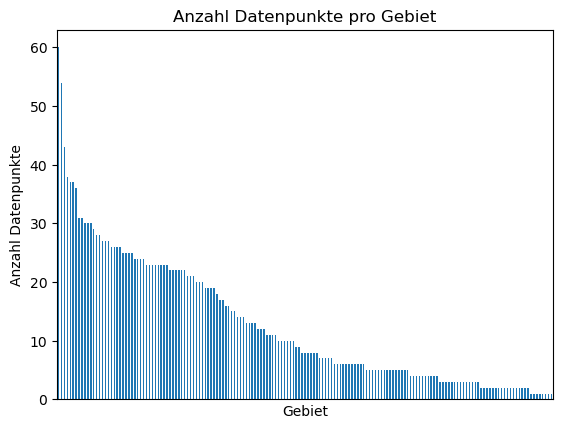

In [54]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

**3.2 Analyse der Codes**

In [55]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  169


In [56]:
df['Code'].value_counts()

Code
USA    60
GBR    54
CAN    43
BRA    38
CRI    37
       ..
MHL     1
GRD     1
QAT     1
LBN     1
SUR     1
Name: count, Length: 169, dtype: int64

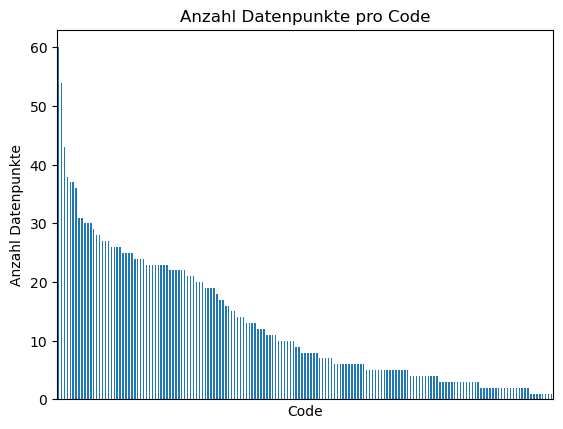

In [57]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

**3.2 Analyse der Jahre**

In [58]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  61


In [59]:
df['Jahr'].value_counts().sort_index()

Jahr
1963     1
1964     1
1965     1
1966     1
1967     1
        ..
2019    77
2020    65
2021    70
2022    27
2023     4
Name: count, Length: 61, dtype: int64

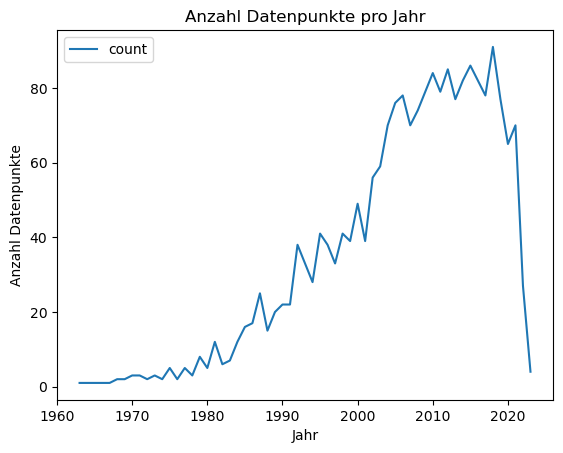

In [60]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.legend()

**3.4 Analyse der Population in Armut**

In [61]:

df.describe()

,Jahr,Anteil Population in Armut,Annotierung
count,2152.000000,2152.000000,0.0
mean,2006.401022,9.192577,NaN
std,10.933486,17.116344,NaN
min,1963.000000,0.000000,NaN
25%,2000.000000,0.228986,NaN
50%,2008.000000,1.021764,NaN
75%,2015.000000,9.480405,NaN
max,2023.000000,91.778530,NaN


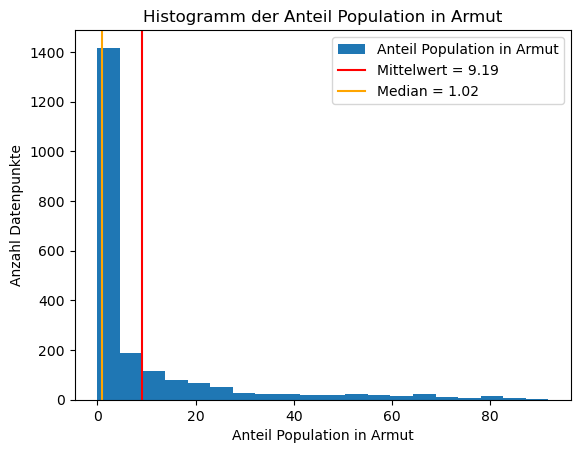

In [62]:
g = df['Anteil Population in Armut'].plot(kind='hist', bins=20, title='Histogramm der Anteil Population in Armut', 
                           xlabel='Anteil Population in Armut', ylabel='Anzahl Datenpunkte')
mean = df['Anteil Population in Armut'].mean()
g.axvline(x=df['Anteil Population in Armut'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  

median = df['Anteil Population in Armut'].median()
g.axvline(x=df['Anteil Population in Armut'].median(), color='orange',label=  f'Median = {median:.2f}') 

g.legend()

**4. Analyse**

**4.1 Beobachtungen**

- Die Länder mit dem höchsten Armutsanteil sind: 
- Die Länder mit dem geringsten Armutsanteil sind: 
- Die grösste Differenz des Armutanteils haben die Länder zwischen den Jahren ...:
- Die kleinste Differenz des Armutanteils haben die Länder zwischen ...:

**4.2 Interpretation**

**4.3 Berechnung**

In [63]:
diffs= df_pivot[2020]-df_pivot[2000]
diffs= diffs.sort_values()
diffs

Gebiet
Indonesia    -41.010125
Kyrgyzstan   -36.851466
Ecuador      -21.634894
Bolivia      -21.125918
Georgia      -17.093038
                ...    
Venezuela           NaN
Vietnam             NaN
Yemen               NaN
Zambia              NaN
Zimbabwe            NaN
Length: 169, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen des Anteils der Population in Armut 2015-2021'}, ylabel='Gebiet'>

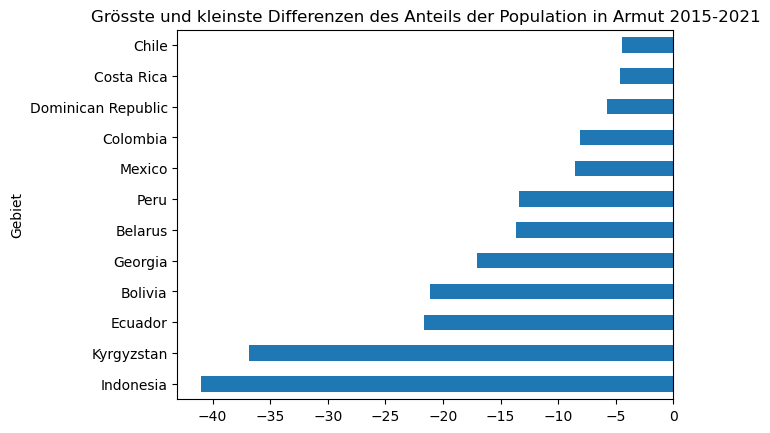

In [64]:
diff_sel = (diffs < -4) | (diffs > 5)  
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen des Anteils der Population in Armut 2015-2021')

In [65]:
Gebiets_liste = diffs[diff_sel].index.tolist() 
print(Gebiets_liste)

['Indonesia', 'Kyrgyzstan', 'Ecuador', 'Bolivia', 'Georgia', 'Belarus', 'Peru', 'Mexico', 'Colombia', 'Dominican Republic', 'Costa Rica', 'Chile']


**4.4 Visualisierung**

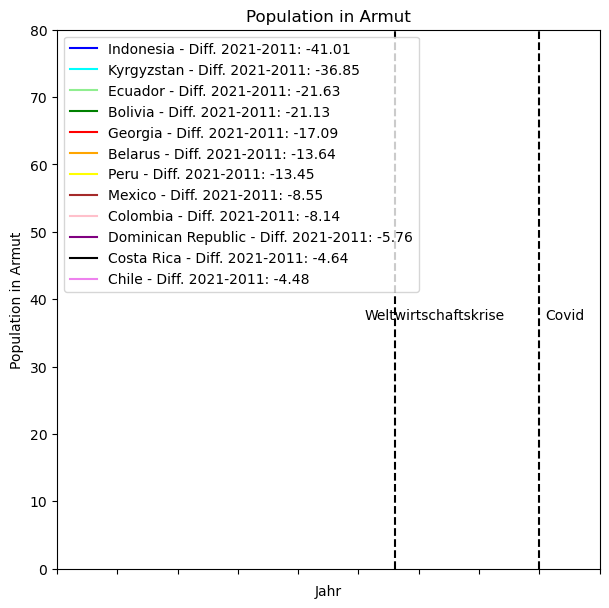

In [90]:
color_dict = {
    'Indonesia': 'blue',
    'Kyrgyzstan': 'cyan',
    'Ecuador': 'lightgreen',
    'Bolivia': 'green',
    'Georgia': 'red',
    'Belarus': 'orange',
    'Peru': 'yellow',
    'Mexico': 'brown',
    'Colombia': 'pink',
    'Dominican Republic': 'purple',
    'Costa Rica': 'black',
    'Chile': 'violet'
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Population in Armut', xlabel='Jahr', ylabel=f'Population in Armut', legend=True,
                                  label=f'{gebiet} - Diff. 2021-2011: {diff:.2f}', 
                                  xlim=[1980,2025], ylim=[0, 80],   
                                  color=color_dict[gebiet],        
                                  figsize=(7,7))                  

# Covid Pandemie    
g.axvline(x=2020, color='black', linestyle='--') 
g.text(2020.5, 37, 'Covid')  

# Weltwirtscgaftskrise
g.axvline(x=2008, color='black', linestyle='--')  
g.text(2005.5, 37, 'Weltwirtschaftskrise');

In [67]:
top_5_countries = df.sort_values
print (top_5_countries)

<bound method DataFrame.sort_values of         Gebiet Code  Jahr  Anteil Population in Armut  Annotierung
0      Albania  ALB  1996                    0.534846          NaN
1      Albania  ALB  2002                    1.092647          NaN
2      Albania  ALB  2005                    0.591086          NaN
3      Albania  ALB  2008                    0.199925          NaN
4      Albania  ALB  2012                    0.620691          NaN
...        ...  ...   ...                         ...          ...
2147    Zambia  ZMB  2015                   60.793095          NaN
2148    Zambia  ZMB  2022                   64.349754          NaN
2149  Zimbabwe  ZWE  2011                   21.580000          NaN
2150  Zimbabwe  ZWE  2017                   34.206043          NaN
2151  Zimbabwe  ZWE  2019                   39.754530          NaN

[2152 rows x 5 columns]>


In [68]:
top_5_niedrigste_werte = df.nsmallest(5, 'Anteil Population in Armut')

print(top_5_niedrigste_werte)

     Gebiet Code  Jahr  Anteil Population in Armut  Annotierung
10  Albania  ALB  2019                         0.0          NaN
14  Algeria  DZA  2011                         0.0          NaN
54  Austria  AUT  1995                         0.0          NaN
55  Austria  AUT  1996                         0.0          NaN
59  Austria  AUT  2000                         0.0          NaN


In [69]:
jahr = 2012
top_5_niedrigste_werte = df[df['Jahr'] == jahr].nsmallest(5, 'Anteil Population in Armut')
print(top_5_niedrigste_werte)

           Gebiet Code  Jahr  Anteil Population in Armut  Annotierung
499       Denmark  DNK  2012                    0.000000          NaN
748       Germany  DEU  2012                    0.000000          NaN
451        Cyprus  CYP  2012                    0.004238          NaN
1826  Switzerland  CHE  2012                    0.008965          NaN
109       Belarus  BLR  2012                    0.012056          NaN


In [70]:
df_pivot = df.pivot_table(index='Gebiet', columns='Jahr', values='Anteil Population in Armut')

df_pivot['max_anteil'] = df_pivot.max(axis=1)

df_pivot['min_anteil'] = df_pivot.min(axis=1)

top_5_hoechster_anteil = df_pivot['max_anteil'].nlargest(5)

top_5_niedrigster_anteil = df_pivot['min_anteil'].nsmallest(5)

print("Top 5 Länder mit dem höchsten Anteil an Armut (maximale Werte über alle Jahre):")
print(top_5_hoechster_anteil)

print("\nTop 5 Länder mit dem niedrigsten Anteil an Armut (minimale Werte über alle Jahre):")
print(top_5_niedrigster_anteil)

Top 5 Länder mit dem höchsten Anteil an Armut (maximale Werte über alle Jahre):
Gebiet
China                           91.778530
Democratic Republic of Congo    91.467300
Guinea                          87.964000
Niger                           85.516365
Eswatini                        85.444000
Name: max_anteil, dtype: float64

Top 5 Länder mit dem niedrigsten Anteil an Armut (minimale Werte über alle Jahre):
Gebiet
Albania       0.0
Algeria       0.0
Austria       0.0
Azerbaijan    0.0
Belarus       0.0
Name: min_anteil, dtype: float64


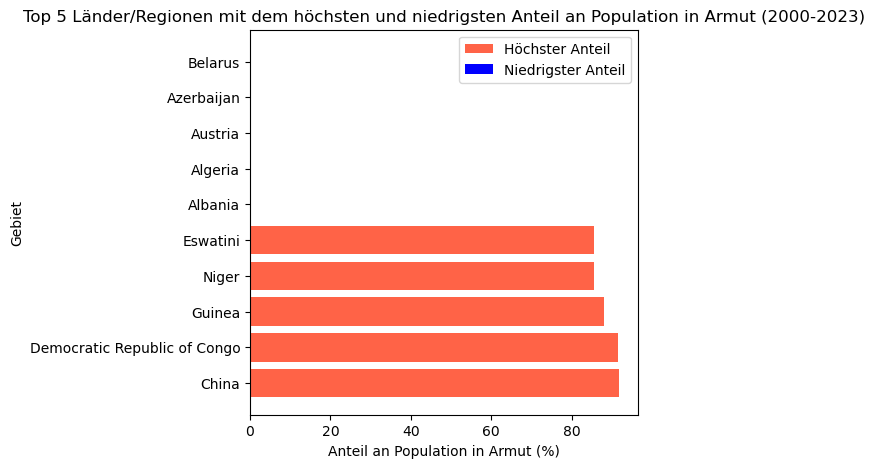

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.barh(top_5_hoechster_anteil.index, top_5_hoechster_anteil, color='tomato', label='Höchster Anteil')

plt.barh(top_5_niedrigster_anteil.index, top_5_niedrigster_anteil, color='blue', label='Niedrigster Anteil')

plt.xlabel('Anteil an Population in Armut (%)')
plt.ylabel('Gebiet')
plt.title('Top 5 Länder/Regionen mit dem höchsten und niedrigsten Anteil an Population in Armut (2000-2023)')
plt.legend()

plt.show()